In [2]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [44 lines of output]
  Traceback (most recent call last):
    File "C:\Users\priya\anaconda3\Lib\site-packages\setuptools\_vendor\packaging\requirements.py", line 35, in __init__
      parsed = _parse_requirement(requirement_string)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\priya\anaconda3\Lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 64, in parse_requirement
      return _parse_requirement(Tokenizer(source, rules=DEFAULT_RULES))
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\priya\anaconda3\Lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 82, in _parse_requirement
      url, specifier, marker = _parse_requirement_details(tokenizer)
                               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\priya\anaconda3\Lib\site-packages\setuptools\_v

In [3]:
import tensorflow as tf
import os

In [4]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
import cv2
import imghdr

C:\Users\priya\AppData\Local\Temp\ipykernel_2804\89219108.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [6]:
data_dir = 'data'
image_exts = ['jpg', 'jpeg', 'png', 'bmp']

In [7]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [8]:
import numpy as np
from matplotlib import pyplot as plt

In [9]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 2023 files belonging to 2 classes.


In [10]:
data_iterator = data.as_numpy_iterator()

In [11]:
batch = data_iterator.next()

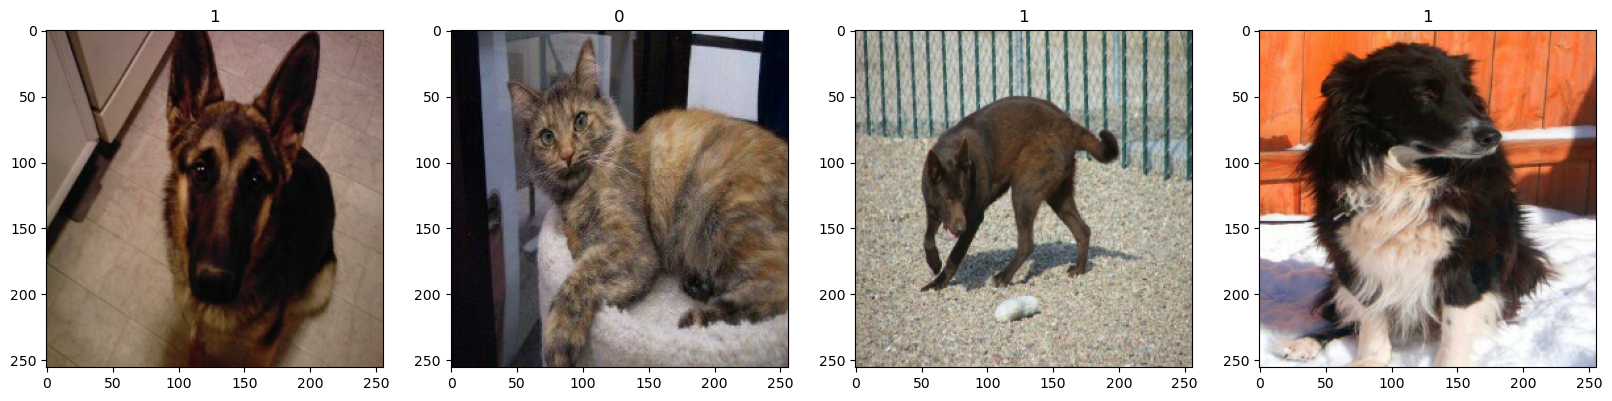

In [12]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [13]:
data = data.map(lambda x,y: (x/255, y))

In [14]:
data.as_numpy_iterator().next()

(array([[[[7.33613074e-01, 7.25769937e-01, 7.37534642e-01],
          [7.36504316e-01, 7.28661180e-01, 7.40425885e-01],
          [7.27524579e-01, 7.19681442e-01, 7.31446147e-01],
          ...,
          [7.15188444e-01, 7.38717854e-01, 7.38717854e-01],
          [7.01291084e-01, 7.24820495e-01, 7.24820495e-01],
          [6.95029080e-01, 7.18558490e-01, 7.18558490e-01]],
 
         [[7.40663290e-01, 7.32820153e-01, 7.44584858e-01],
          [7.42248774e-01, 7.34405637e-01, 7.46170342e-01],
          [7.32146144e-01, 7.24303007e-01, 7.36067712e-01],
          ...,
          [7.16902733e-01, 7.40432143e-01, 7.40432143e-01],
          [7.05759823e-01, 7.29289234e-01, 7.29289234e-01],
          [7.00773597e-01, 7.24303007e-01, 7.24303007e-01]],
 
         [[7.52152264e-01, 7.44309127e-01, 7.56073833e-01],
          [7.50888467e-01, 7.43045330e-01, 7.54810035e-01],
          [7.38289237e-01, 7.30446100e-01, 7.42210805e-01],
          ...,
          [7.18282759e-01, 7.41812170e-01, 7.4181

In [15]:

train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [16]:

test_size

7

In [17]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [19]:
model = Sequential()

In [20]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

C:\Users\priya\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [21]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
logdir='logs'

In [24]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)


In [26]:
hist = model.fit(train, epochs=16, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/16
44/44 ━━━━━━━━━━━━━━━━━━━━ 8s 170ms/step - accuracy: 0.7238 - loss: 0.5404 - val_accuracy: 0.7043 - val_loss: 0.5904
Epoch 2/16
44/44 ━━━━━━━━━━━━━━━━━━━━ 7s 152ms/step - accuracy: 0.7911 - loss: 0.4468 - val_accuracy: 0.7163 - val_loss: 0.6025
Epoch 3/16
44/44 ━━━━━━━━━━━━━━━━━━━━ 7s 147ms/step - accuracy: 0.8878 - loss: 0.2781 - val_accuracy: 0.7620 - val_loss: 0.7110
Epoch 4/16
44/44 ━━━━━━━━━━━━━━━━━━━━ 7s 155ms/step - accuracy: 0.9122 - loss: 0.2039 - val_accuracy: 0.7668 - val_loss: 0.7740
Epoch 5/16
44/44 ━━━━━━━━━━━━━━━━━━━━ 7s 147ms/step - accuracy: 0.9406 - loss: 0.1528 - val_accuracy: 0.7404 - val_loss: 0.8730
Epoch 6/16
44/44 ━━━━━━━━━━━━━━━━━━━━ 7s 147ms/step - accuracy: 0.9720 - loss: 0.1014 - val_accuracy: 0.7500 - val_loss: 1.1338
Epoch 7/16
44/44 ━━━━━━━━━━━━━━━━━━━━ 7s 146ms/step - accuracy: 0.9554 - loss: 0.1287 - val_accuracy: 0.7764 - val_loss: 0.9438
Epoch 8/16
44/44 ━━━━━━━━━━━━━━━━━━━━ 7s 147ms/step - accuracy: 0.9819 - loss: 0.0546 - val_accuracy: 0.

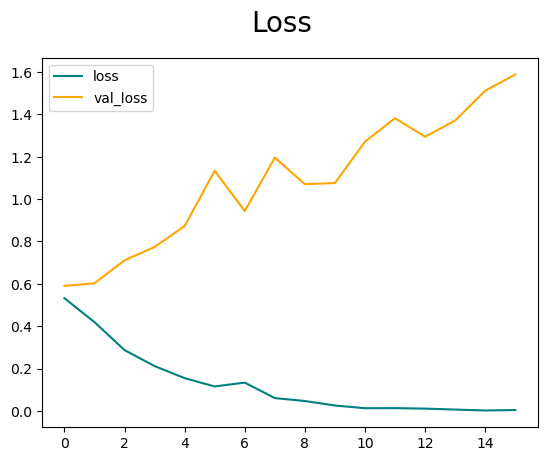

In [27]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

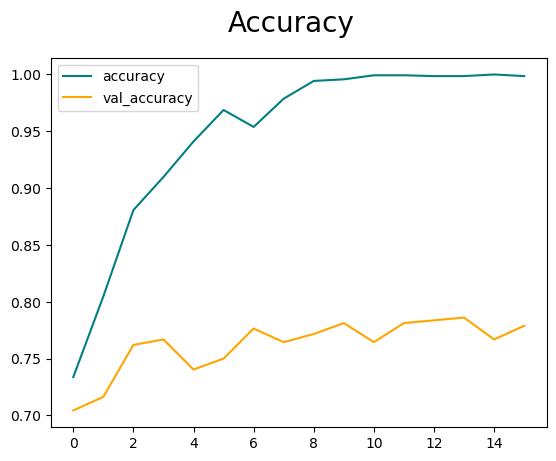

In [28]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [29]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [30]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [31]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


In [32]:
pre.result().numpy(), re.result().numpy(), acc.result().numpy()

(0.64285713, 0.64285713, 0.6482412)

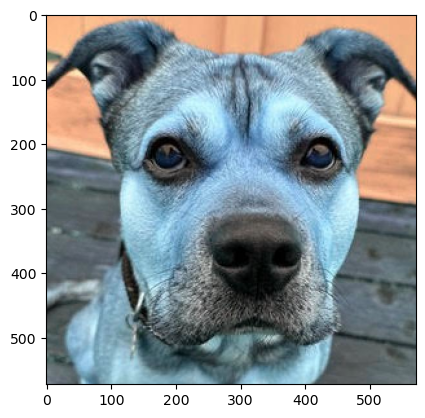

In [33]:
img = cv2.imread('20240521070445.png')
plt.imshow(img)
plt.show()

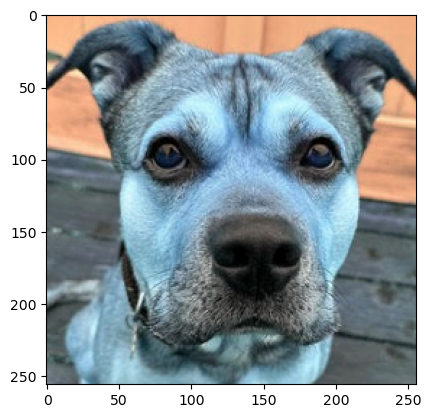

In [34]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [35]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [36]:
yhat[0][0]

0.99999464

In [37]:

if yhat[0][0] > 0.5: 
    print(f'Dog')
else:
    print(f'Cat')

Dog


In [38]:
from tensorflow.keras.models import load_model

In [39]:
model.save(os.path.join('models','imageclassifier.keras'))

In [40]:
new_model = load_model('models/imageclassifier.keras')

In [41]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


array([[0.99999464]], dtype=float32)